## R's system for Monte Carlo draws

Some of my favorite distributions:

In [5]:
runif(10, 1, 6)

[1] 3.334412 3.585883 2.359758 3.937493 1.915700 1.306950 4.511906 2.478248
 [9] 1.287378 5.417294

In [6]:
rnorm(10, 2, 2)

[1]  1.192231517  1.323225898 -0.003703357  0.653162589  1.443803422
 [6]  1.491158551  2.792902800 -0.301921463  3.660788141  2.640034952

In [8]:
rexp(10, .1)

[1]  3.910680  2.112946  1.131360  4.108940  1.409214  4.469512 14.159289
 [8]  7.191382 14.025862 15.927490

In [10]:
rt(10, 10)

[1]  0.01375094 -0.86023225  0.53065255 -0.02980784  0.53364949  0.15410651
 [7]  0.34896964  0.98786673  0.00224230  0.57782969

In [11]:
rbeta(10, 2, 5)

[1] 0.20711214 0.06042110 0.08679964 0.44971256 0.09053043 0.19455803
 [7] 0.71649290 0.11811411 0.31921125 0.33887801

Look at one of these as a histogram plot.

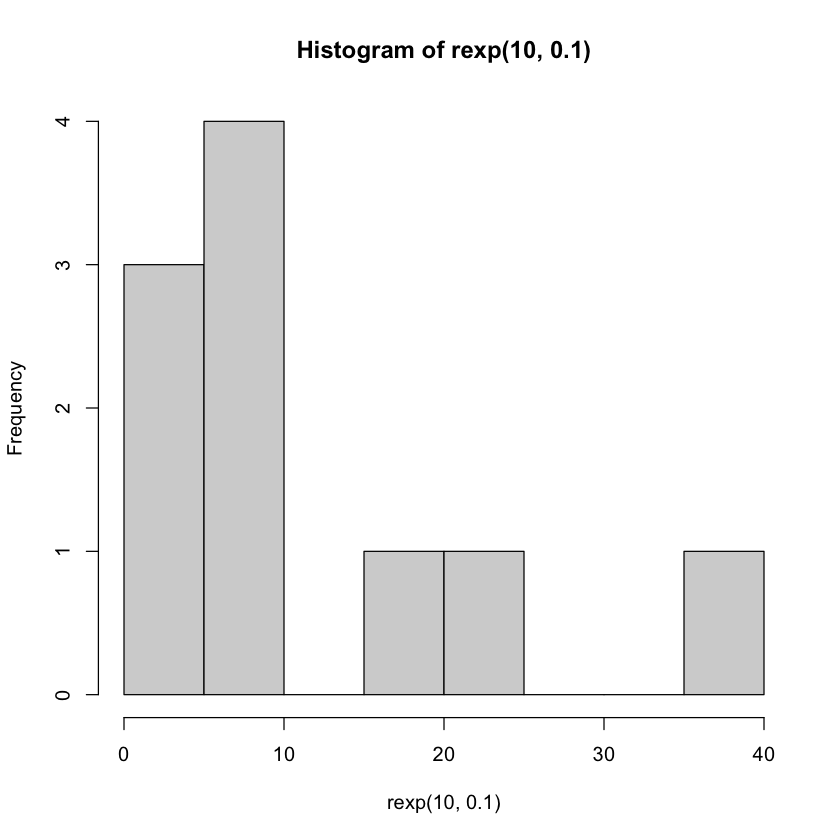

In [12]:
hist(rexp(10, .1))

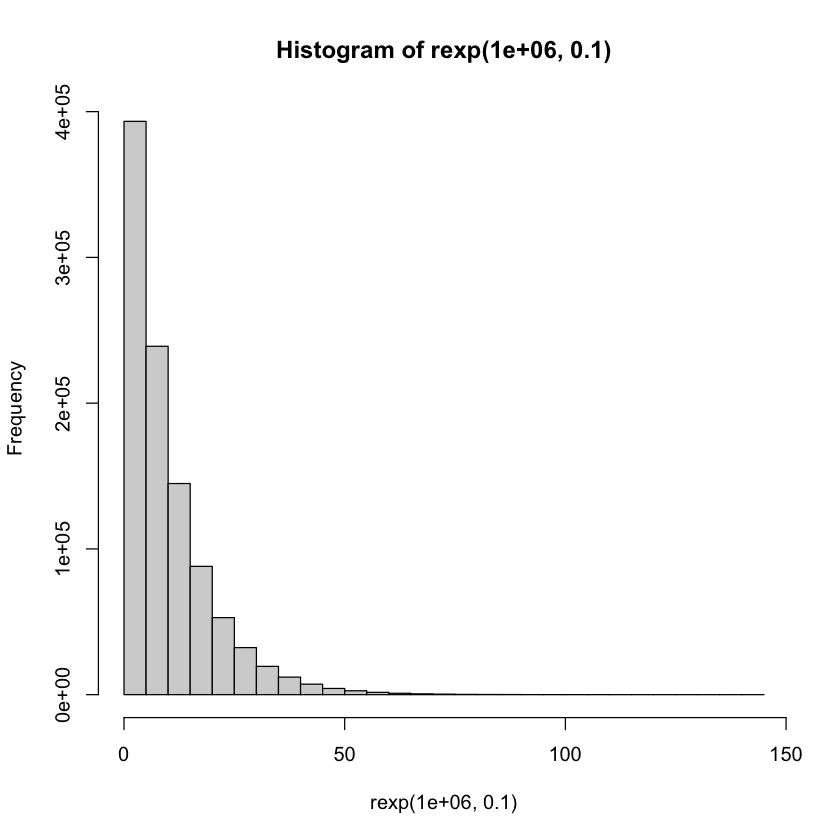

In [13]:
hist(rexp(1000000, .1))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



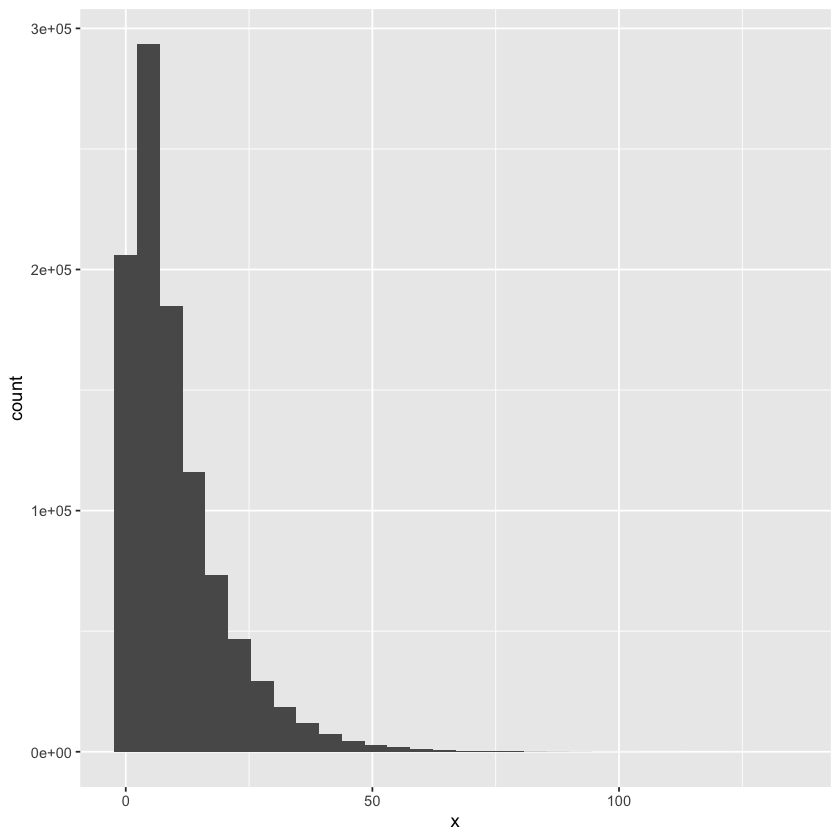

In [16]:
library(ggplot2)
ggplot(data.frame(x=rexp(1000000, .1)), aes(x)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 7 rows containing missing values (geom_bar).”


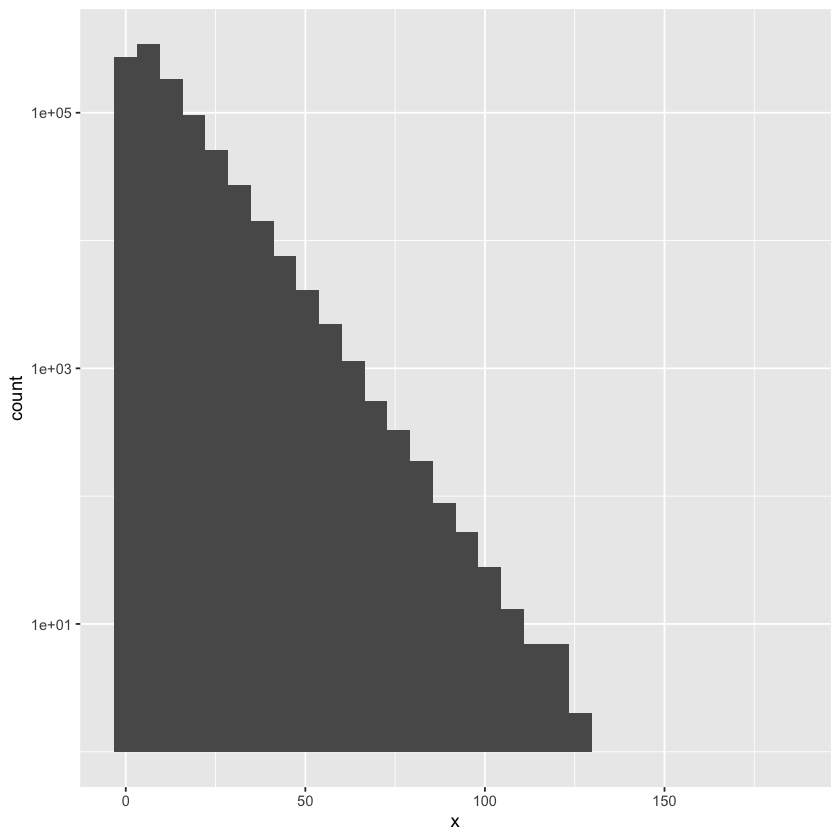

In [18]:
library(ggplot2)
ggplot(data.frame(x=rexp(1000000, .1)), aes(x)) + geom_histogram() + scale_y_log10()

## Convince ourselves of the central limit theorem

Each person take a distribution function. Let's set up the Central Limit Theorem!

Step 1. Take the average of N draws of a distribution.

In [24]:
mean(rexp(10, .1))

[1] 11.83011

Step 2. Do that many times.

In [28]:
draws = c()
for (ii in 1:10000)
    draws = c(draws, mean(rexp(10, .1)))

Step 3. Plot it!

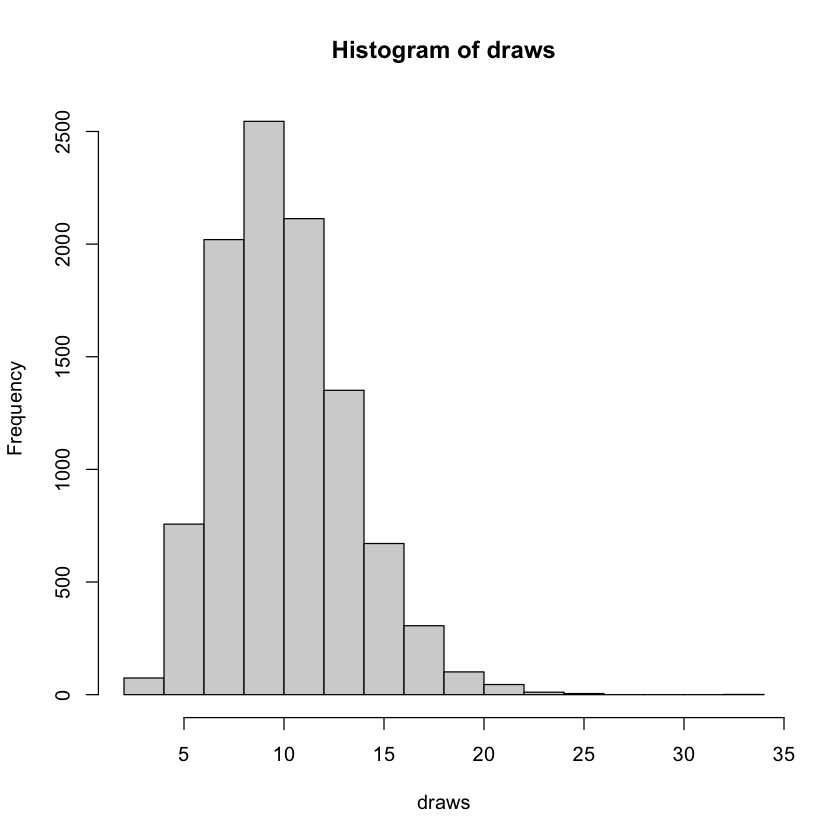

In [29]:
hist(draws)

Step 4. Try it again with more averaging.

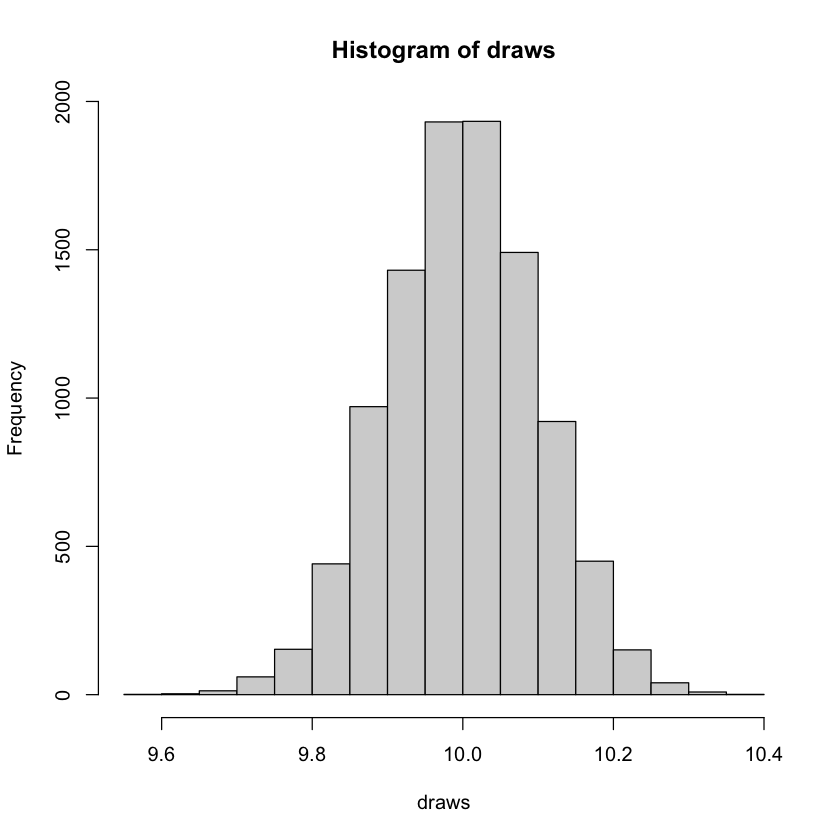

In [30]:
draws = c()
for (ii in 1:10000)
    draws = c(draws, mean(rexp(10000, .1)))
hist(draws)

## Long tails

Look at the normal distribution and the cauchy distribution.

Normal distribution:

$X = \frac{1}{n} \sum_i X_i$

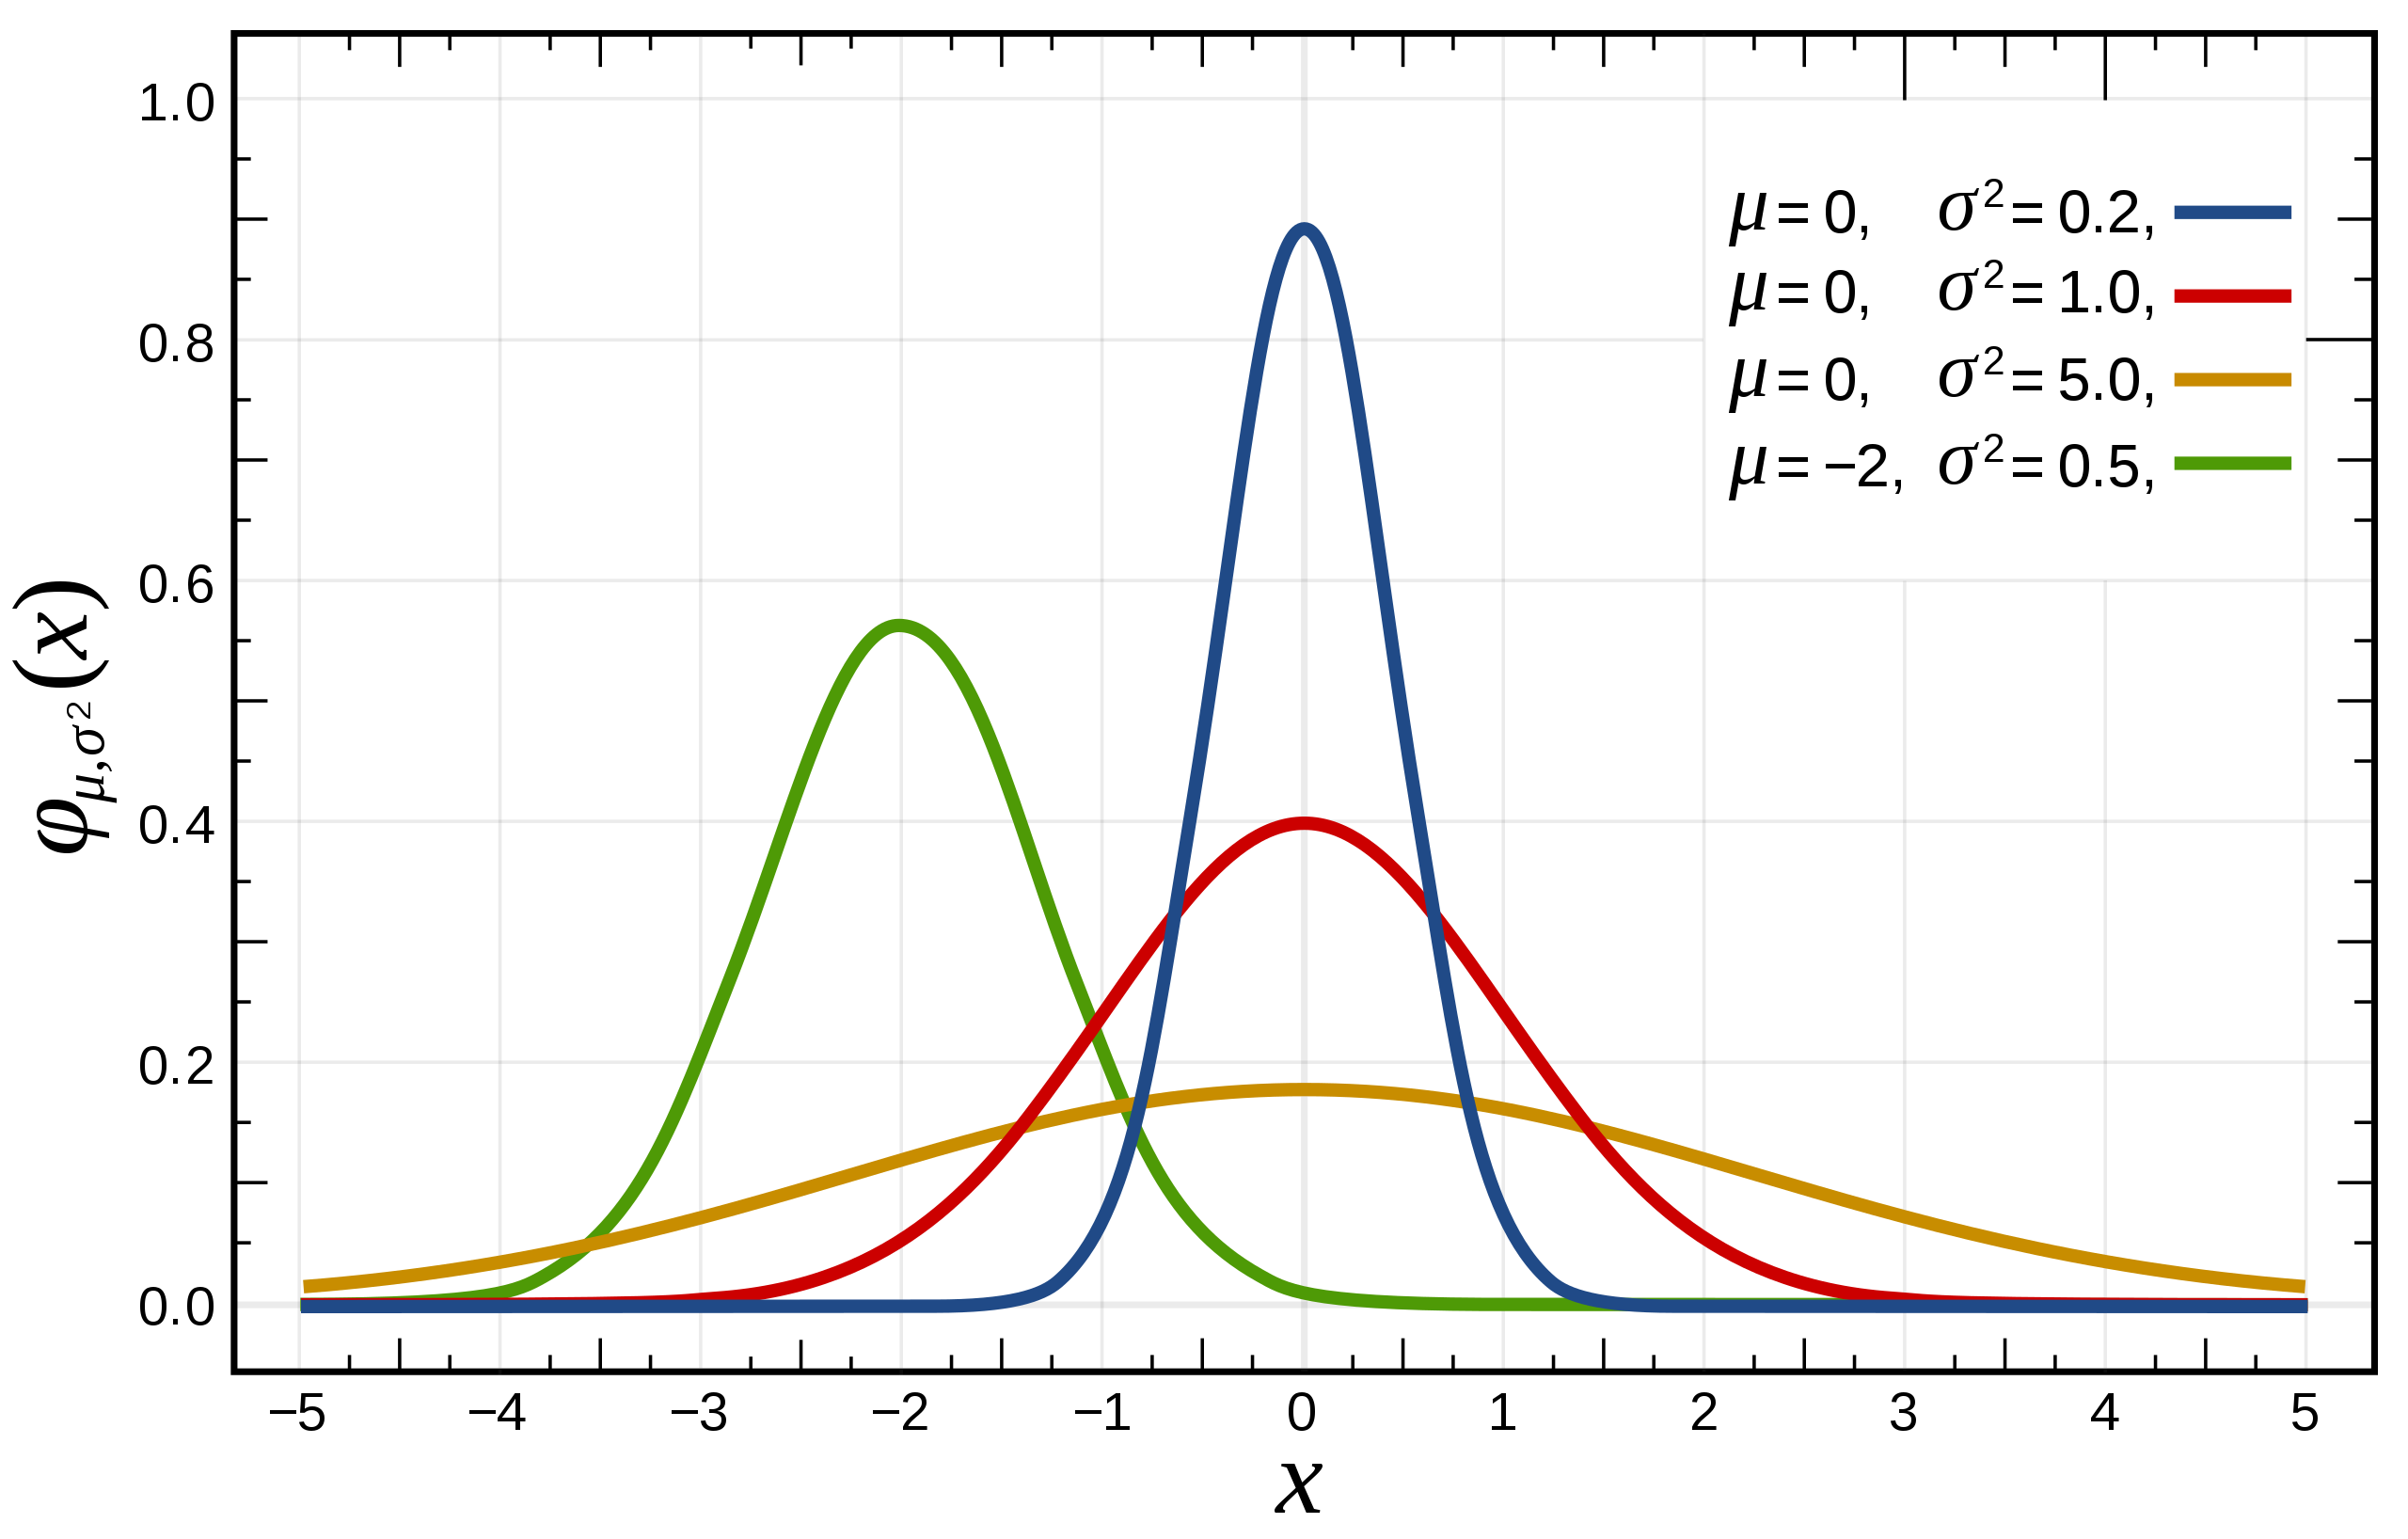

Cauchy distribution:
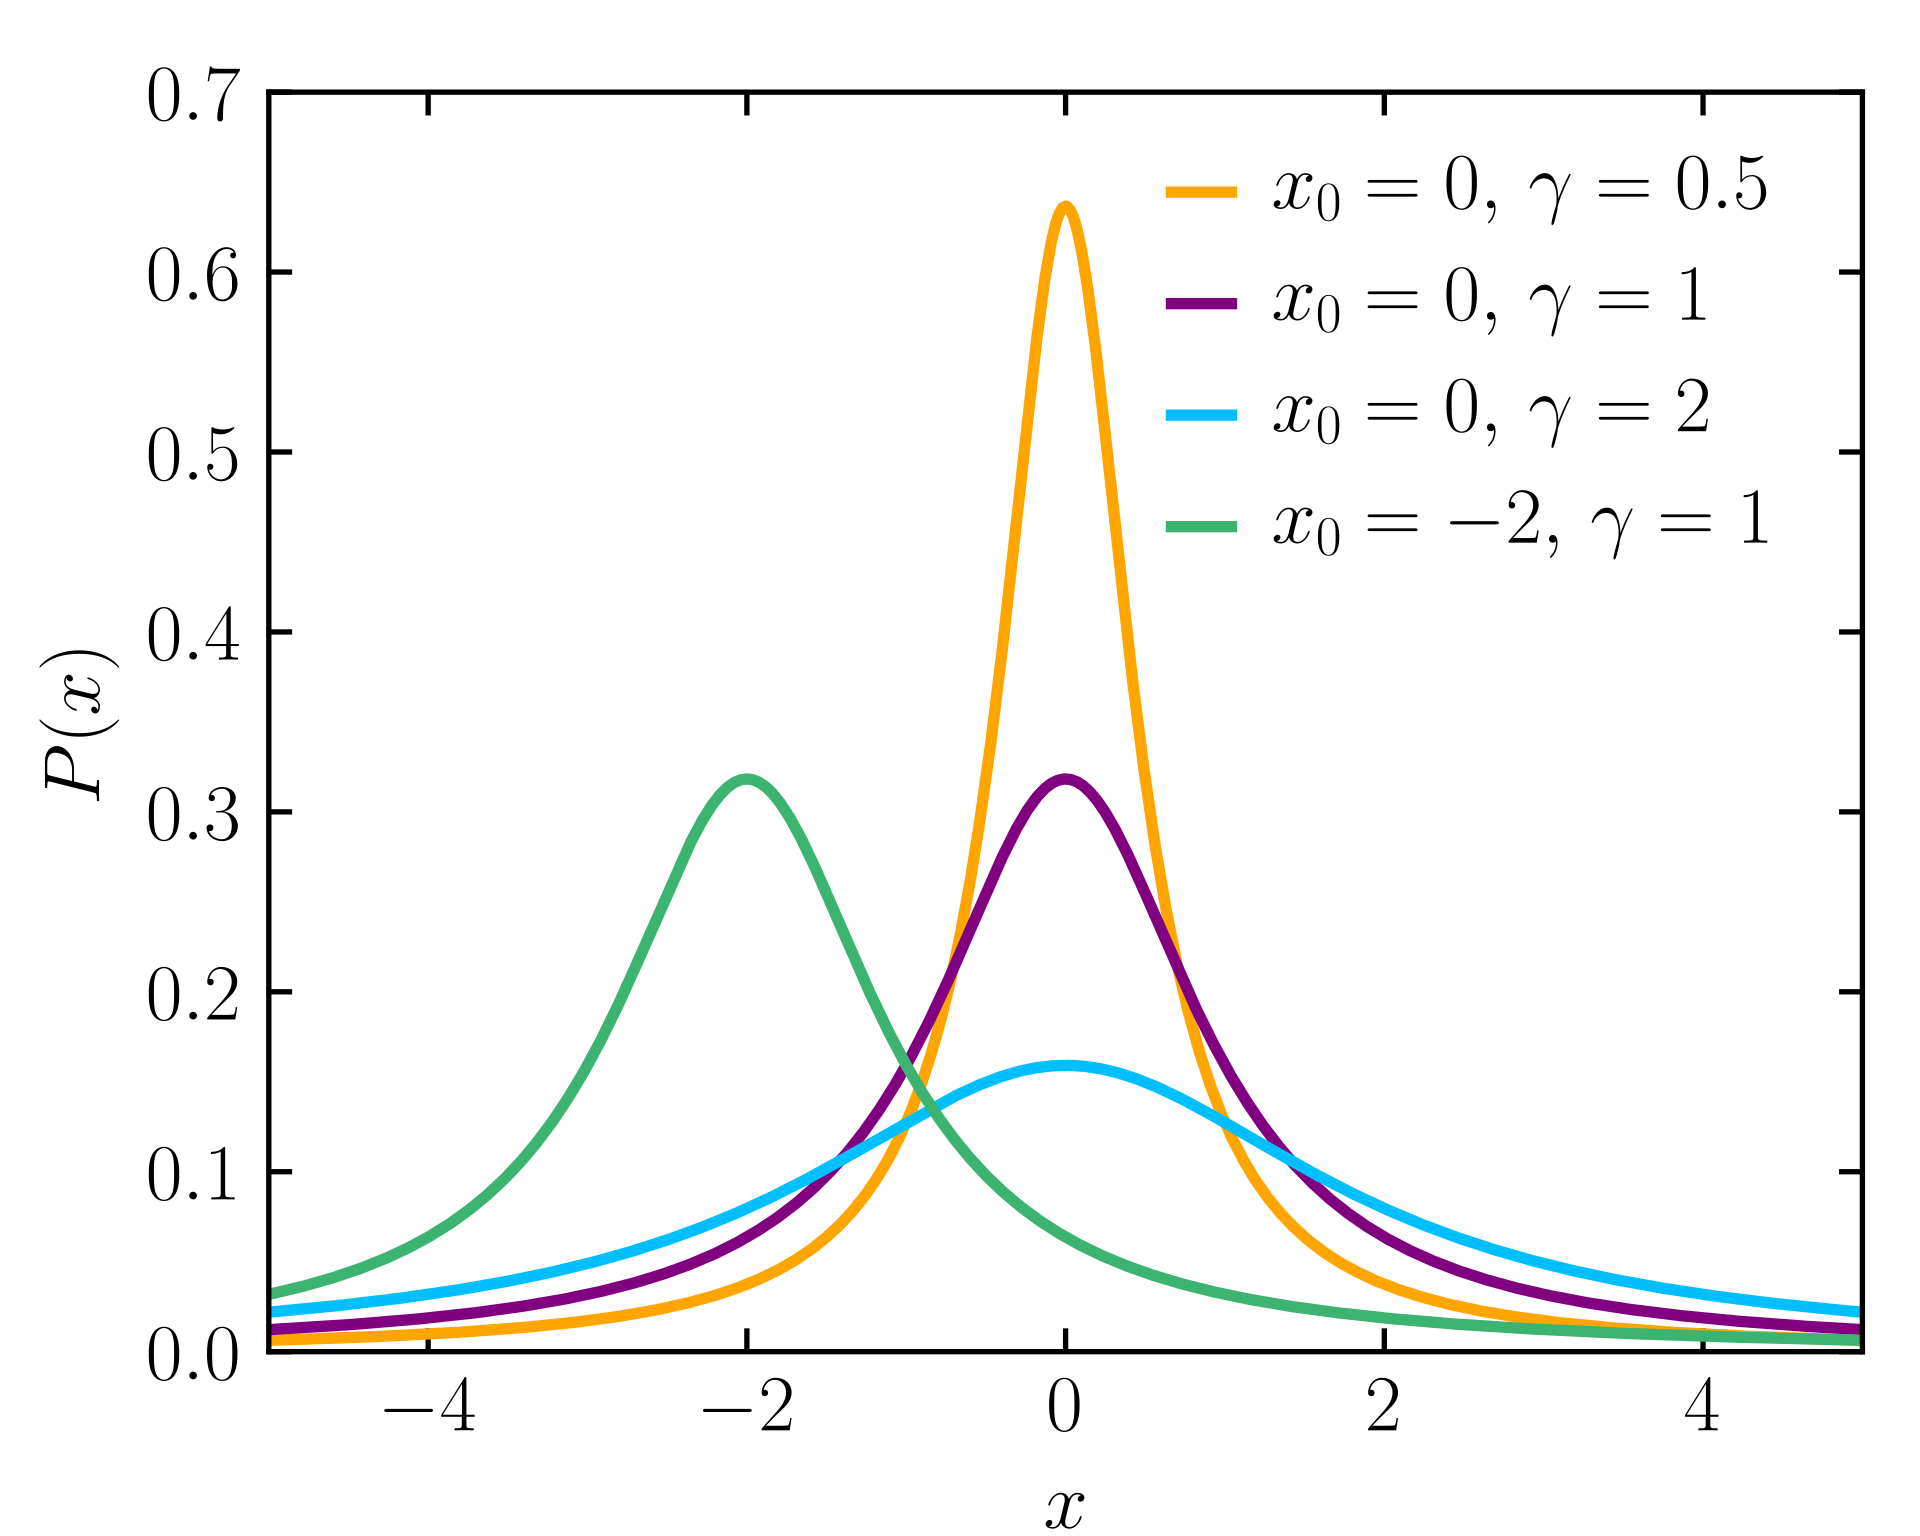

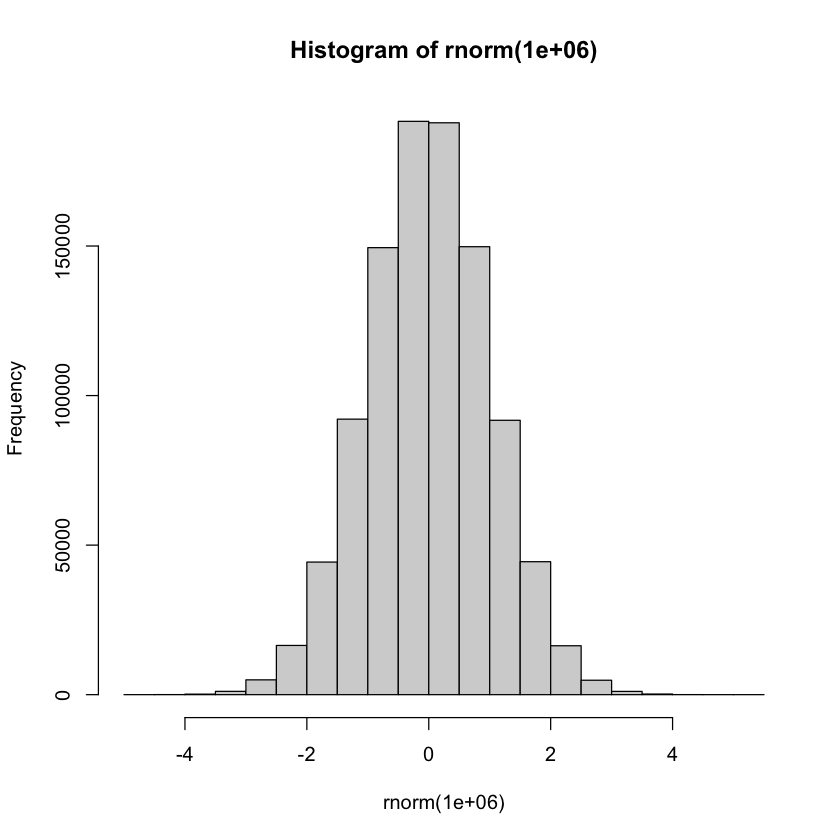

In [3]:
hist(rnorm(1000000))

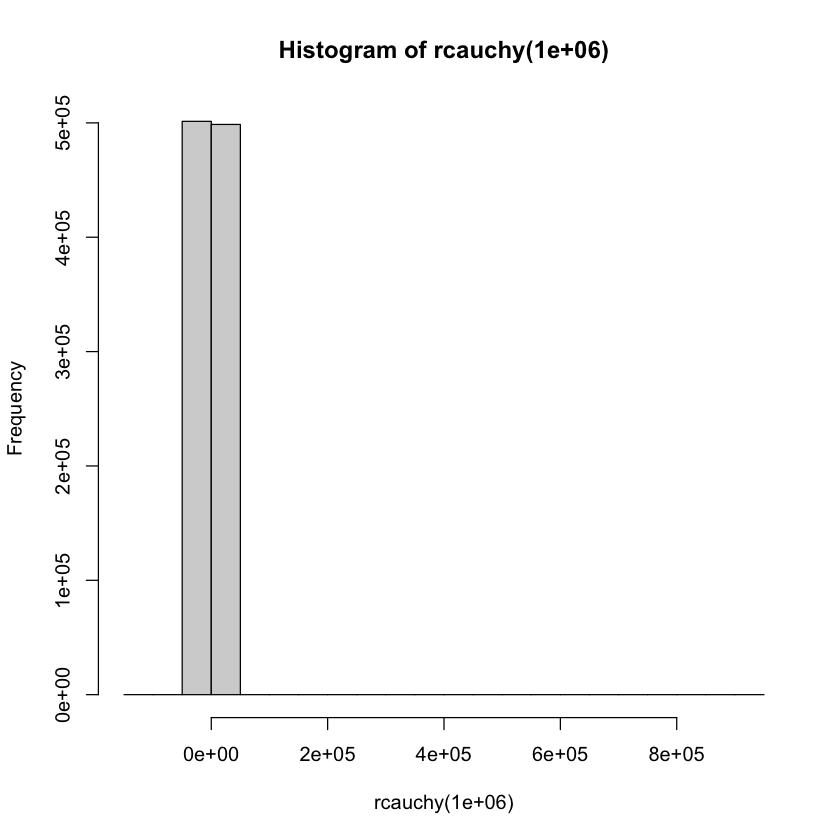

In [4]:
hist(rcauchy(1000000))

### Central limit theorem revisited

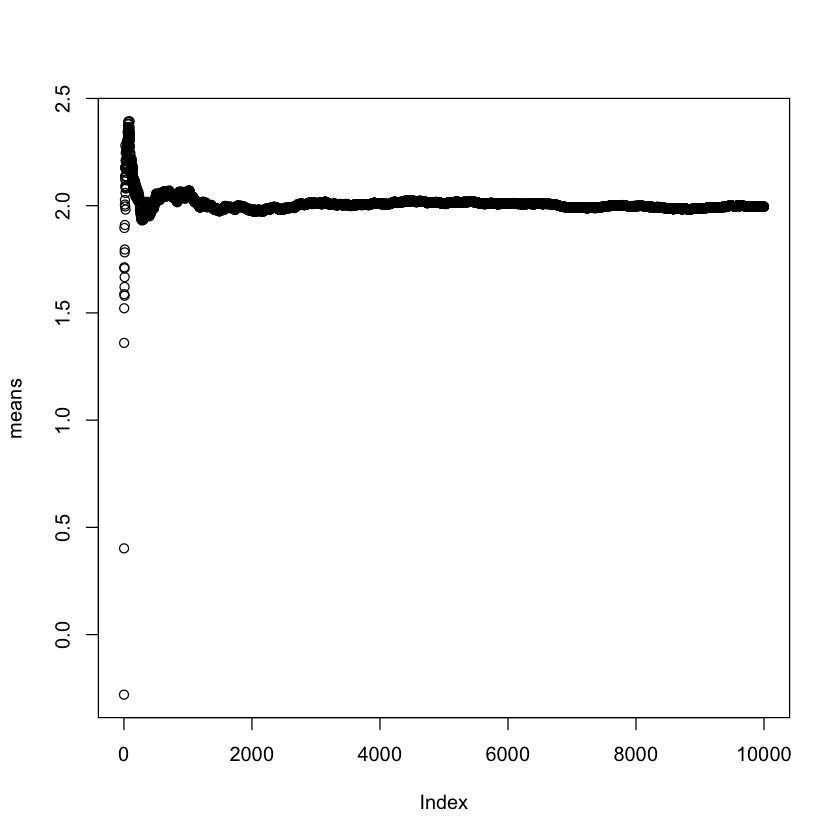

In [3]:
draws = rnorm(10000, 2, 2)
means = c()
for (ii in 1:10000)
    means = c(means, mean(draws[1:ii]))
plot(means)

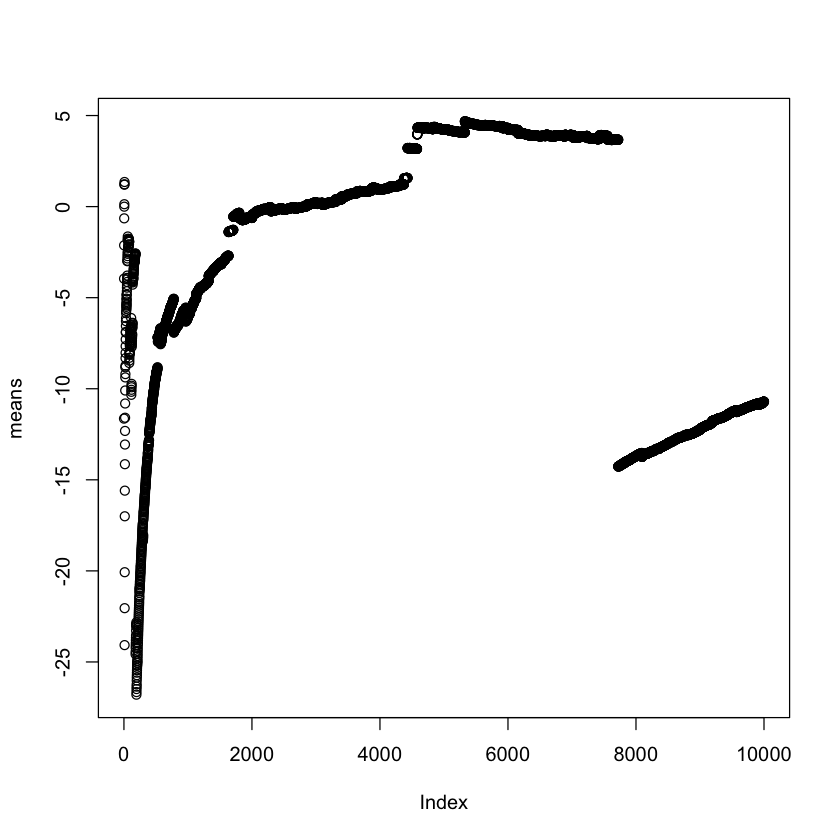

In [5]:
draws = rcauchy(10000, 2, 2)
means = c()
for (ii in 1:10000)
    means = c(means, mean(draws[1:ii]))
plot(means)

# Feedback to long-tails

Roe & Baker (2007)

In [4]:
deltaT0 = 1.2 # C

In [1]:
ff = rnorm(1000000, .62, .1)

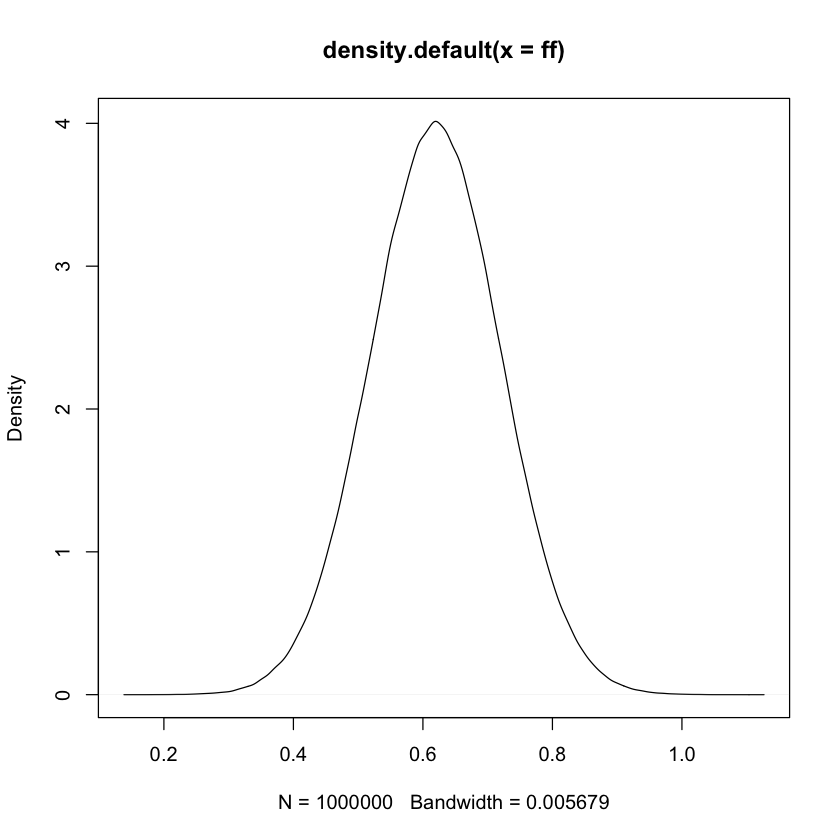

In [2]:
plot(density(ff))

In [5]:
deltaT = deltaT0 / (1 - ff)

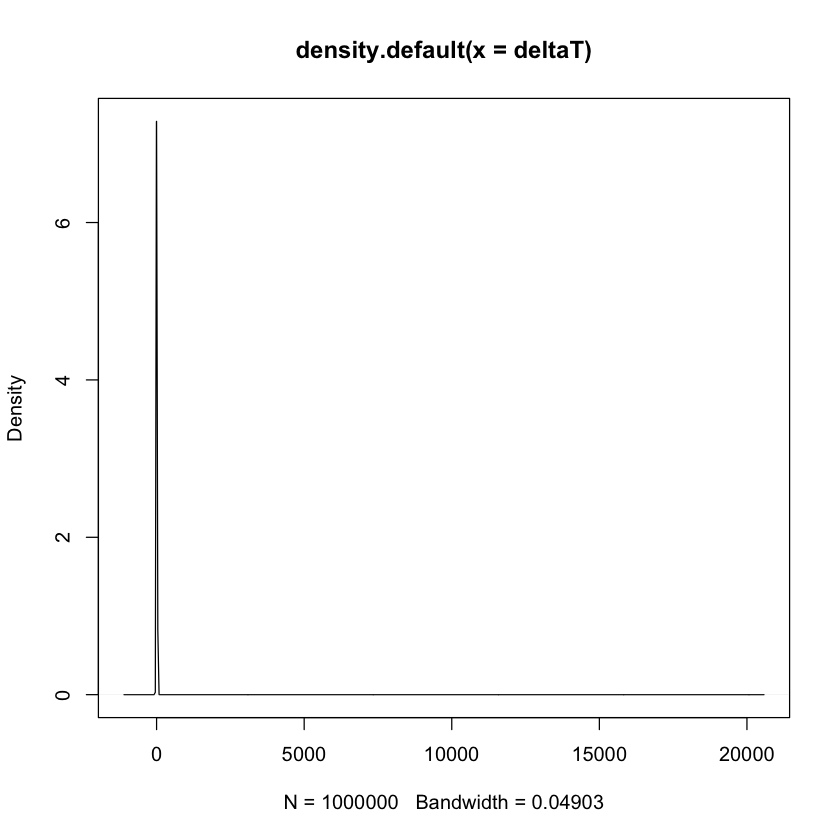

In [7]:
plot(density(deltaT))

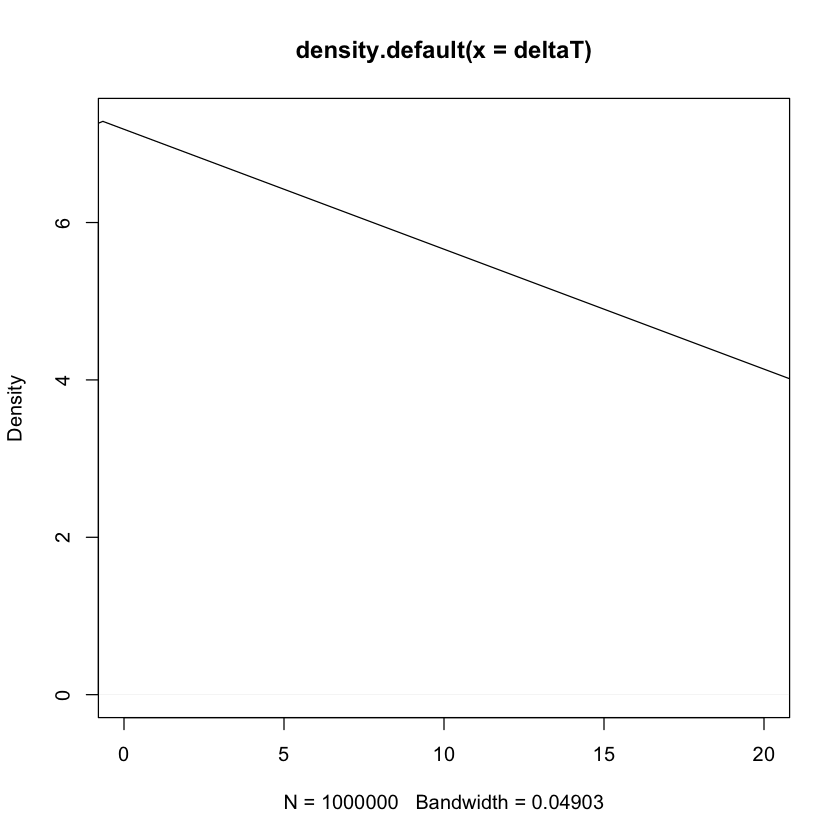

In [8]:
plot(density(deltaT), xlim=c(0, 20))

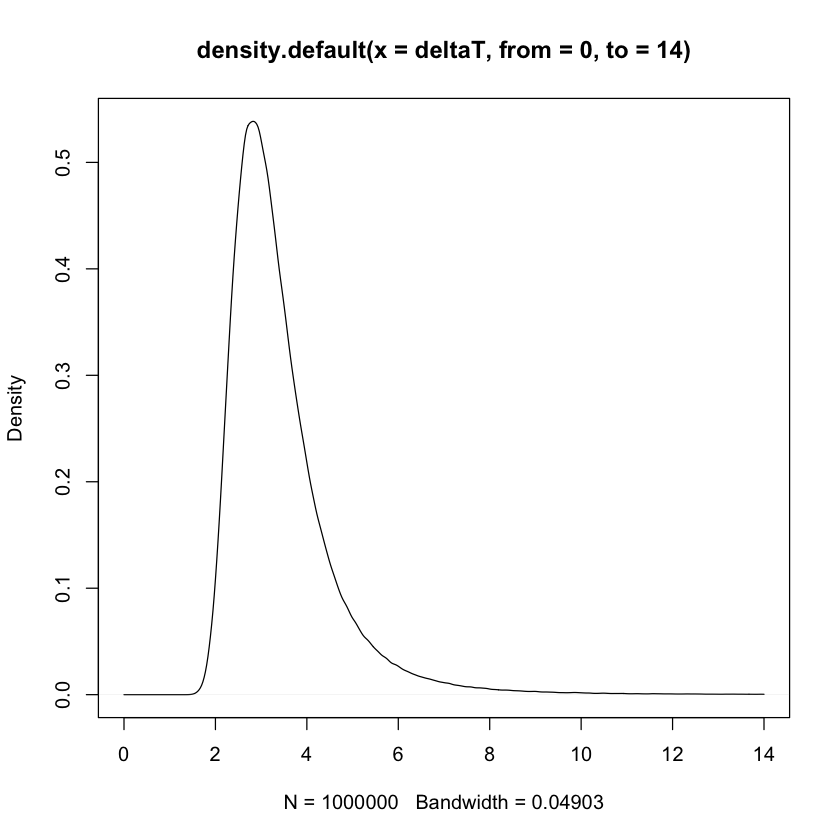

In [11]:
plot(density(deltaT, from=0, to=14))

## A little information theory

Entropy is a measure of how much information is gained when you find out the value of a random variable. It depends on the probability distribution of the random variable. The equation is:
$$H(X) = -\sum_x p(x) \log_2{p(x)}$$

### Example: a weighted coin

The coin can take 2 possible values: Heads or Tails. An evenly weighted coin has a probability of 0.5 for each outcome. But the probability of the outcomes could be different.

In [6]:
# Evenly weighted coin:
-(.5 * log2(.5) + .5 * log2(.5))

[1] 1

That is 1 bit of information.

In [8]:
# Extremely weighted coin:
-(0.001 * log2(0.001) + 0.999 * log2(0.999))

[1] 0.01140776

Almost no information: we already knew the answer beforehand.

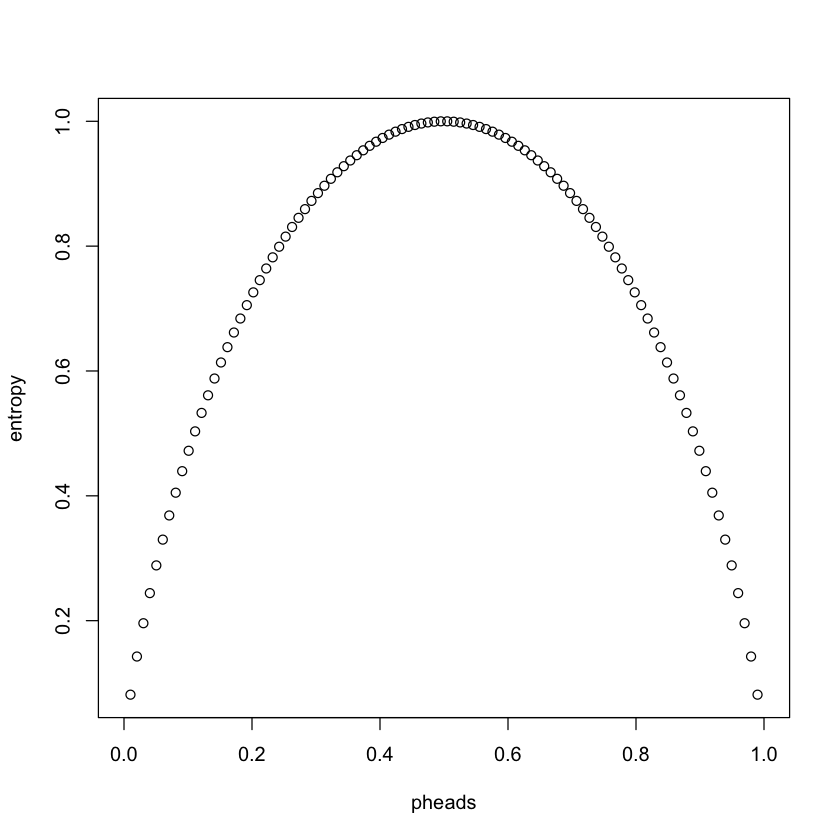

In [9]:
pheads = seq(0, 1, length.out=100)
entropy = -(pheads * log2(pheads) + (1 - pheads) * log2(1 - pheads))
plot(pheads, entropy)

## Entropy of English

### Model 1: all letters are equally weighted

In [11]:
-(26 * ((1 / 26) * log2(1 / 26)))

[1] 4.70044

### Model 2: Let's measure the actual likelihood of letters!

In [20]:
data = readChar("~/groups/complexsysanalysis/week4/carroll-alice.txt", 144395)

In [21]:
data = tolower(data)

In [22]:
substring(data, 1, 20)

[1] "[alice's adventures "

In [23]:
letters

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j" "k" "l" "m" "n" "o" "p" "q" "r" "s"
[20] "t" "u" "v" "w" "x" "y" "z"

In [24]:
install.packages("stringr")
library(stringr)


The downloaded binary packages are in
	/var/folders/ct/41x7w7z57bz67wts0zlgxf940000gn/T//RtmpGwHdUJ/downloaded_packages


In [25]:
str_count(data, "a")

[1] 8791

In [26]:
counts = c()
for (letter in letters) {
    counts = c(counts, str_count(data, letter))
}

In [27]:
counts

[1]  8791  1476  2398  4929 13570  2000  2531  7372  7510   146  1158  4713
[13]  2104  7012  8145  1524   209  5437  6500 10685  3465   846  2675   148
[25]  2263    78

In [34]:
sum(counts)

[1] 80348

In [28]:
probs = counts / sum(counts)

In [29]:
-sum(probs * log2(probs))

[1] 4.160957

In [36]:
counts = c()
for (letter1 in letters) {
  for (letter2 in letters)
    counts = c(counts, str_count(data, paste0(letter1, letter2)))
}

In [37]:
counts

[1]    0  214  157  442    0   63  160   25  715   12  125  929  183 1606    3
 [16]  109    0  705  899 1163   76  168   75    4  257    5   80   66    0    1
 [31]  524    0    0    0  110    7    0  105    1    0  203    0    0   59   28
 [46]    8  203    0    0    0   76    0  310    0   16    0  705    0    0  450
 [61]   30    0  177   66    0    0  341    0    0  108    1   74  103    0    0
 [76]    0    8    0   70    1    0   62  443   10   31    1  227    1    0   61
 [91]    0   52  433    0    0   87   85    0   60   18    3    0   45    0  763
[106]   12  128  932  481   72  122   32   94    0   14  437  253  935   28  140
[121]    0 1820  572  318    1  193   44  104  213   14  108    0    0    0  149
[136]  120    0    0  166    0    0   34    0    0  321    0    0   85    0   74
[151]   96    0    0    0    4    0  217    0    0    0  285    0   17  311   82
[166]    0    0   60    0   12  198    1    0  204   62    2   44    0    0    0
[181]    1    1 1147    4    0    1 3778    1    0    0  780    1    0    4    5
[196]    3  571    0    0   82    4  225   56    0    0    0   44    0   32   14
[211]  598  688  191  160  209    0    5    0   97  311  222 2026  172   17    0
[226]  214  578 1324    2   60    0    9    0   26    6    0    1    0   20    0
[241]    0    0    0    0    0    0    0    0   17    0    0    0    0    0  102
[256]    0    0    0    0    0    8    0    0    0  364    0    0    0  211    0
[271]    0   22    0  138    0    0    0    1   18    0    1    0    0    0    9
[286]    0  308    4    1  334  730  145    1    0  855    0   59  681    8    0
[301]  322   12    0    4   43   48   14   12   15    0  436    0  306   61    0
[316]    0  580   10    0    0  170    0    0    1   15   15  314   74    0    0
[331]   25    0  124    0    0    0   68    0   89    0  176 1269  553   19 1140
[346]    2  160    3  109   87    0   50  543    2    6    2  129  457   54   19
[361]    5   17   87    0   17   38   96   98   47  619   37   45  121    0  208
[376]  166  285 1054  444  103   11  674  122  421 1556   86  540   11   11    2
[391]  115    2    0    0  286    0    0   61  128    0    0  175    0    0  175
[406]  114    0   87   31   55   69    0    0    0   15    0    0    0    0    0
[421]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[436]    0  208    0    0    0    0    0  267    1   54  177 1148    8   63   19
[451]  355    0   59   46   75   85  347   69    0   87  341  242   80    7    8
[466]    0  369    0  652    0   31    0  785    0    1  852  254    0   47   67
[481]   25   55  419   84    6    0  183  598  159    0   30    0    6    0  246
[496]    0   43    0  751   11    0 3475  466    0    0  277   18   12  999    0
[511]    0  153  158  335  190    0   77    0   55    0   18   30  171   51  161
[526]    5  172    0   81    0    0  330   49  244    3  210    0  499  422  589
[541]    0    0    0    0    0   14   19    0    0    0  698    0    0    0   60
[556]    0    0    0    0    0   63    0    0    0    0    0    1    0    0    0
[571]    3    0  584    0    0   10  347    5    0  508  367    0    0   31    0
[586]  139  271    0    0   32   20    0    0    0    0    0    0    0   12    0
[601]   13    0   24    0    0    0   23    0    0    0    0    0    0   23    0
[616]    0    0   38    0    0    0    0    0    0    8   10    0    0   97    0
[631]    0    0   50    0    0    1    4    1  497   55    0    0   37   34    0
[646]    0    3    0    0    0    7    0    0    0   31    0    0    0   10    0
[661]    0   14    0    0    0    0    0    0    0    0    0    0    0    0    2
[676]   14

In [38]:
length(counts)

[1] 676

In [39]:
sum(counts)

[1] 80348

In [40]:
probs = counts / sum(counts)
probs[probs == 0] = NA

In [42]:
-sum(probs * log2(probs), na.rm=T) / 2

[1] 3.615063

In [43]:
2^3.6150628522824

[1] 12.253

In [44]:
counts = c()
for (letter1 in letters) {
  for (letter2 in letters)
    for (letter3 in letters)
      counts = c(counts, str_count(data, paste0(letter1, letter2, letter3)))
}

In [45]:
probs = counts / sum(counts)
probs[probs == 0] = NA
-sum(probs * log2(probs), na.rm=T) / 3

[1] 3.125495

In [46]:
2^3.12549472032879

[1] 8.727054